In [55]:
import cv2 as cv
import numpy as np
import pandas as pd
from keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [78]:
shareable_link = 'https://drive.google.com/file/d/1dvp0EHSSj0xr3iqijB-8V1Tn4kKf4JVI/view?usp=sharing'
file_id = shareable_link.split('/d/')[1].split('/view')[0]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
data = pd.read_csv(download_url)

In [79]:
data.shape

(0, 3)

In [60]:
X = my_data[:,1:]
y = my_data[:,:1]

In [81]:
print(X.shape)
print(y.shape)

(372450, 784)
(372450, 1)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train = np.reshape(X_train,(X_train.shape[0],28,28))
X_test = np.reshape(X_test,(X_test.shape[0],28,28))

In [63]:
print(X_train.shape)
print(X_test.shape)

(297960, 28, 28)
(74490, 28, 28)


In [82]:
print(y_train.shape)
print(y_test.shape)

(297960, 1)
(74490, 1)


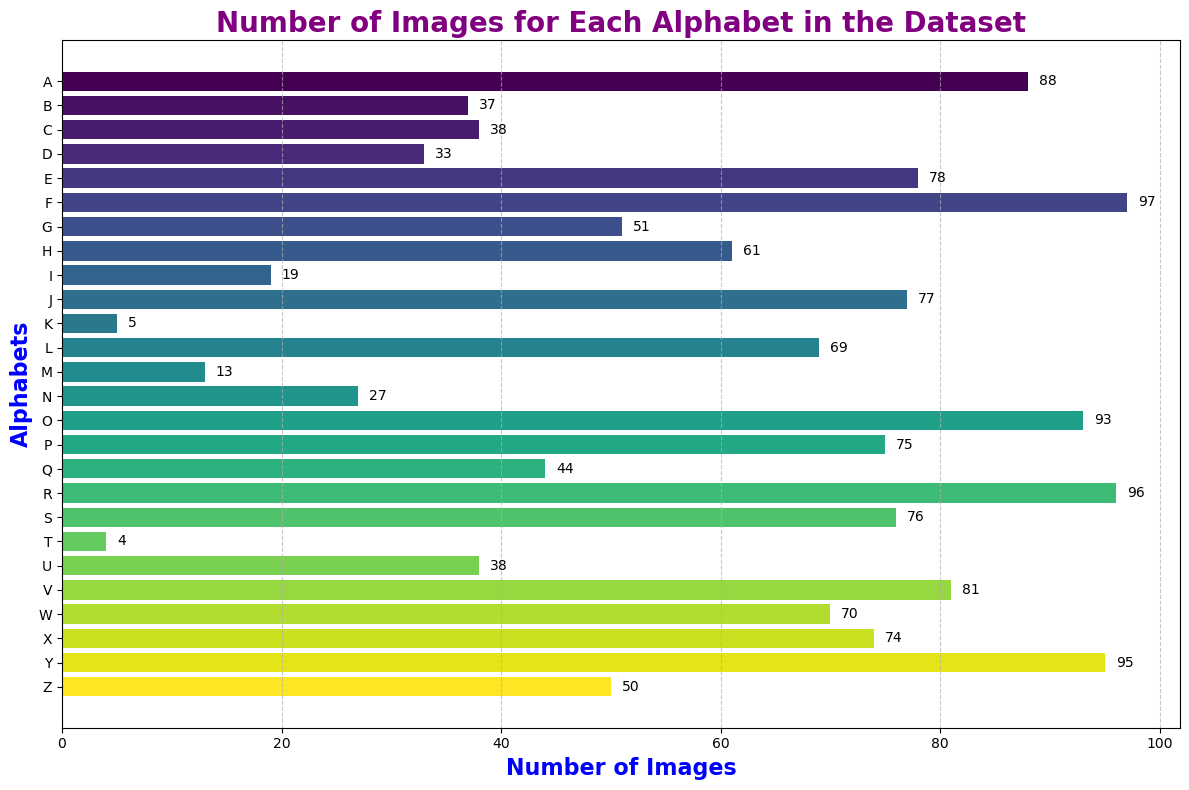

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

count = np.random.randint(0, 100, size=26) 
alphabets = ['A','B','C','D','E','F','G','H','I','J','K','L','M',
             'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

colors = plt.cm.viridis(np.linspace(0, 1, len(alphabets)))
plt.figure(figsize=(12, 8))
bars = plt.barh(alphabets, count, color=colors)
plt.xlabel("Number of Images", fontsize=16, fontweight='bold', color='blue')
plt.ylabel("Alphabets", fontsize=16, fontweight='bold', color='blue')
plt.title("Number of Images for Each Alphabet in the Dataset", fontsize=20, fontweight='bold', color="purple")
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar, count in zip(bars, count):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{count}', va='center', fontsize=10)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

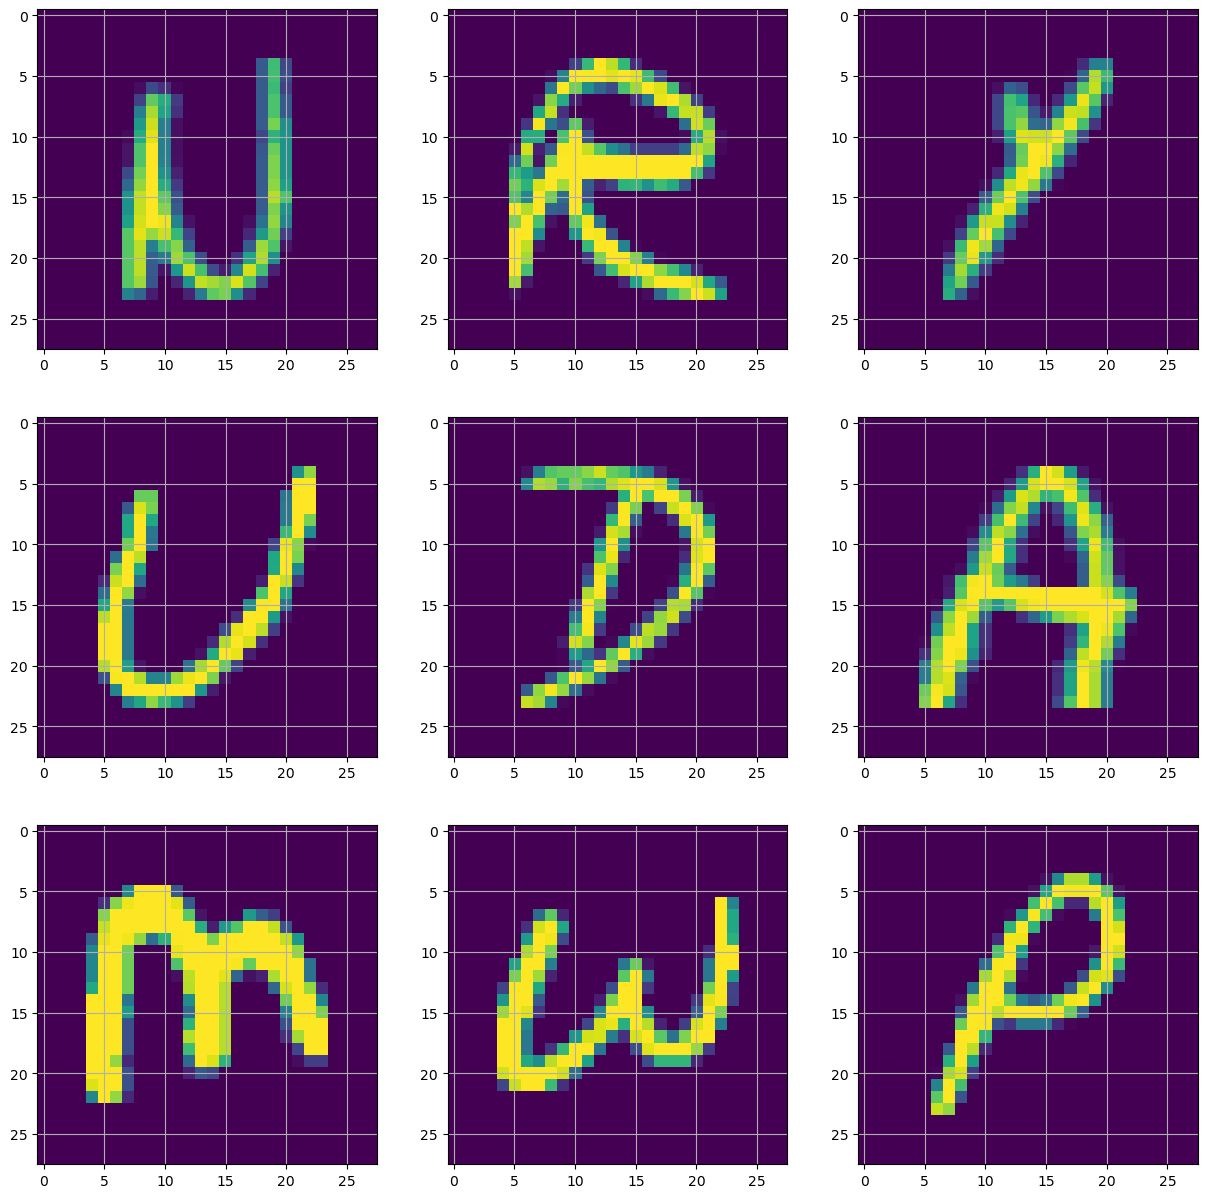

In [84]:
img_list = shuffle(X_train[:1000])
fig,ax = plt.subplots(3,3,figsize=(15,15))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(img_list[i])
    axes[i].grid()
plt.show()

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

print("New shape of train and test dataset")
print(X_train.shape)
print(X_test.shape)

New shape of train and test dataset
(297960, 28, 28, 1)
(74490, 28, 28, 1)


In [18]:
X_train = X_train/255.
X_test = X_test/255.

In [19]:
categorical_ytrain = to_categorical(y_train, num_classes = 26, dtype = 'int')
print("New shape of train labels:", categorical_ytrain.shape)

categorical_ytest = to_categorical(y_test, num_classes = 26, dtype = 'int')
print("New shape of test labels:", categorical_ytest.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [20]:
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2),strides = 2))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Conv2D(filters = 128, kernel_size = (3,3),activation = 'relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(26,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.001) 
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [22]:
history = model.fit(x = X_train, y = categorical_ytrain, epochs = 100, callbacks=[es,mc], validation_data = (X_test,categorical_ytest))

Epoch 1/100
9309/9312 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.9573
Epoch 1: val_accuracy improved from -inf to 0.98355, saving model to best_model.h5
9312/9312 [==============================] - 146s 16ms/step - loss: 0.1499 - accuracy: 0.9573 - val_loss: 0.0611 - val_accuracy: 0.9836
Epoch 2/100
9310/9312 [============================>.] - ETA: 0s - loss: 0.0595 - accuracy: 0.9836
Epoch 2: val_accuracy improved from 0.98355 to 0.98778, saving model to best_model.h5
9312/9312 [==============================] - 145s 16ms/step - loss: 0.0595 - accuracy: 0.9836 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 3/100
9308/9312 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9873
Epoch 3: val_accuracy improved from 0.98778 to 0.98832, saving model to best_model.h5
9312/9312 [==============================] - 146s 16ms/step - loss: 0.0454 - accuracy: 0.9873 - val_loss: 0.0415 - val_accuracy: 0.9883
Epoch 4/100
9309/9312 [=================

In [23]:
model.evaluate(X_test,categorical_ytest)

2328/2328 [==============================] - 10s 4ms/step - loss: 0.0452 - accuracy: 0.9923


[0.045172806829214096, 0.9923479557037354]

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [25]:
print("The validation accuracy is :", history.history['val_accuracy'][-1])
print("The training accuracy is :", history.history['accuracy'][-1])
print("The validation loss is :", history.history['val_loss'][-1])
print("The training loss is :", history.history['loss'][-1])

The validation accuracy is : 0.9923479557037354
The training accuracy is : 0.9951335787773132
The validation loss is : 0.045172806829214096
The training loss is : 0.018615439534187317


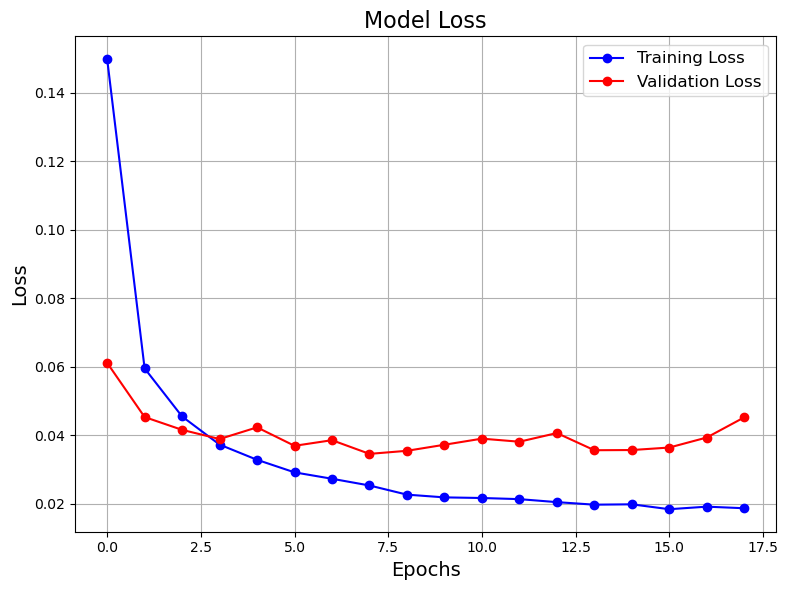

In [72]:
plt.figure(figsize=(8, 6)) 
plt.plot(history.history['loss'], marker='o', linestyle='-', color='b', label='Training Loss')
plt.plot(history.history['val_loss'], marker='o', linestyle='-', color='r', label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True) 
plt.legend(fontsize=12)
plt.tight_layout() 
plt.show()

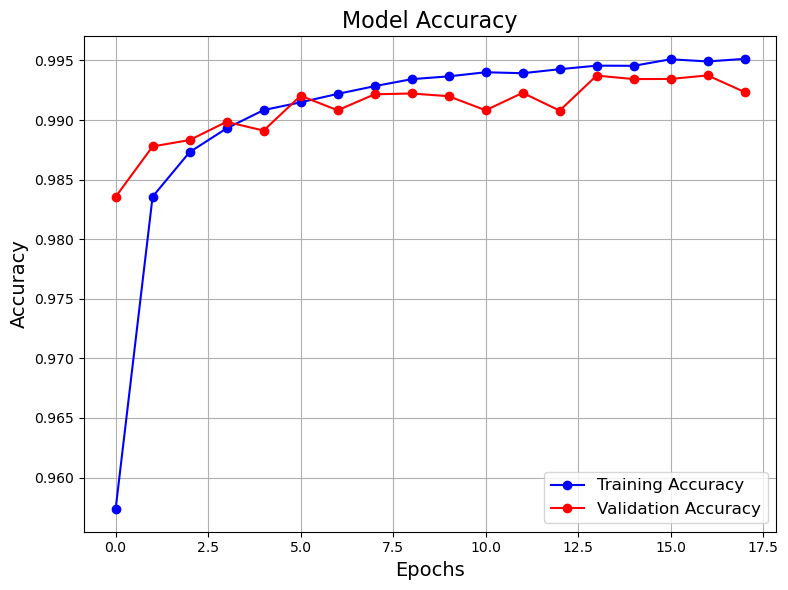

In [73]:
plt.figure(figsize=(8, 6))  
plt.plot(history.history['accuracy'], marker='o', linestyle='-', color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], marker='o', linestyle='-', color='r', label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True) 
plt.legend(fontsize=12)
plt.tight_layout()  
plt.show()

1/1 [==============================] - 0s 15ms/step


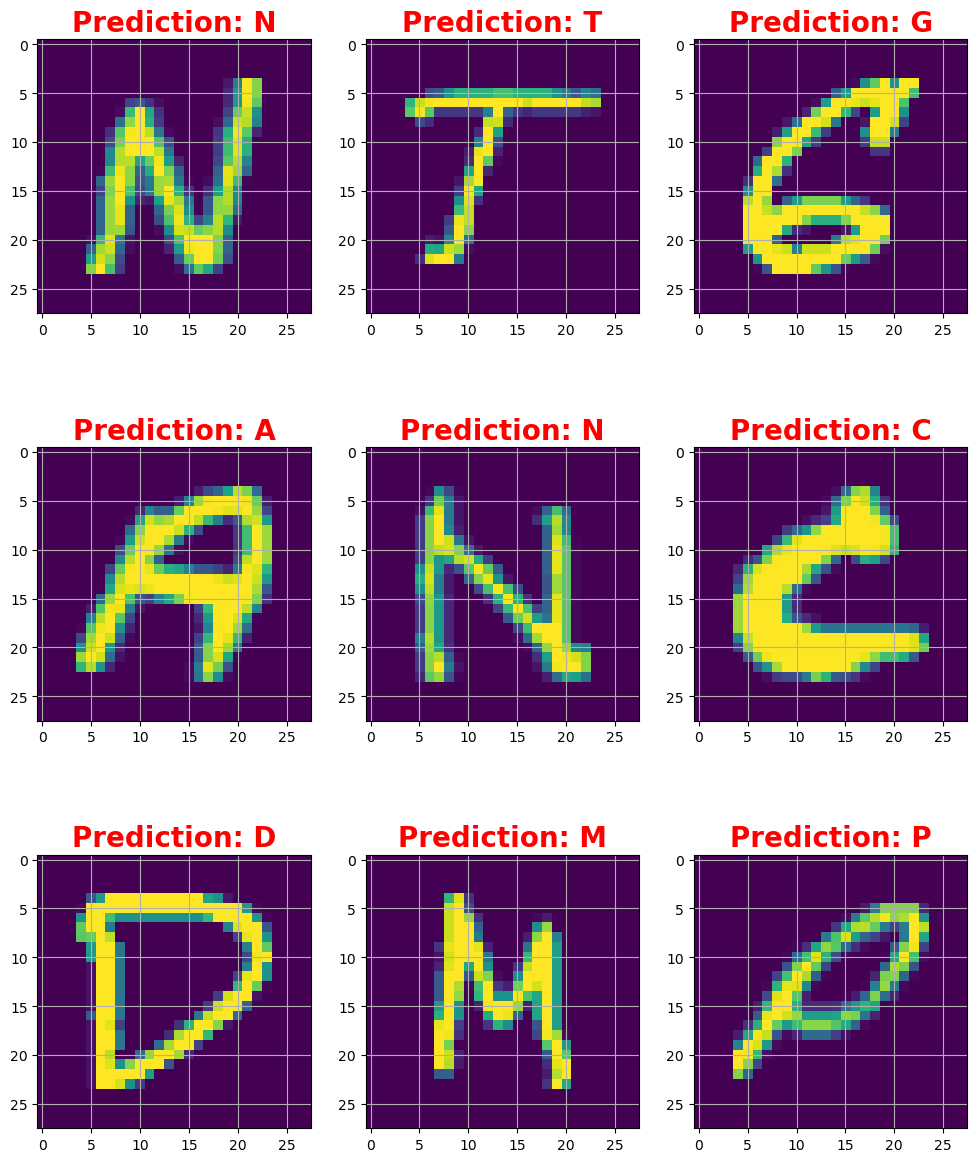

In [75]:
dict_word = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

img_list_test = shuffle(X_test[:1000])
fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i in range(9):
    img = np.reshape(X_test[i], (28, 28))
    axes[i].imshow(img_list_test[i])
    
    pred = dict_word[np.argmax(model.predict(np.reshape(img_list_test[i],(1,28,28,1))))]
    axes[i].set_title("Prediction: " + pred, fontsize = 20, fontweight = 'bold', color = 'red')
    axes[i].grid()